In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)


In [5]:
import kagglehub

# Download latest version
data_path = kagglehub.dataset_download("firecastrl/us-wildfire-dataset")

print("Path to dataset files:", data_path)

print(os.listdir(data_path))

Using Colab cache for faster access to the 'us-wildfire-dataset' dataset.
Path to dataset files: /kaggle/input/us-wildfire-dataset
['Wildfire_Dataset.csv']


In [8]:
file_path = os.path.join(data_path, "Wildfire_Dataset.csv")
wild_fires = pd.read_csv(file_path)
wild_fires.head()

,latitude,longitude,datetime,Wildfire,pr,rmax,rmin,sph,srad,tmmn,tmmx,vs,bi,fm100,fm1000,erc,etr,pet,vpd
0,48.128431,-97.276685,2018-08-15,No,0.0,78.6,14.9,0.00582,272.6,282.0,301.6,3.0,40.0,10.2,12.2,54.0,7.5,5.5,1.59
1,48.128431,-97.276685,2018-08-16,No,0.0,80.4,13.9,0.00676,264.0,283.9,304.9,3.0,40.0,9.7,12.0,56.0,8.2,5.9,1.93
2,48.128431,-97.276685,2018-08-17,No,0.0,70.9,20.4,0.00672,265.6,285.8,300.7,3.1,40.0,9.2,11.9,56.0,7.2,5.3,1.51
3,48.128431,-97.276685,2018-08-18,No,5.0,65.2,19.4,0.00756,261.4,289.0,303.3,5.1,0.0,9.9,12.0,40.0,10.0,6.9,1.85
4,48.128431,-97.276685,2018-08-19,No,0.0,100.0,42.2,0.00895,166.8,283.8,296.5,4.7,41.0,11.8,12.1,47.0,4.6,3.4,0.66


In [4]:
wild_fires.tail()

,latitude,longitude,datetime,Wildfire,pr,rmax,rmin,sph,srad,tmmn,tmmx,vs,bi,fm100,fm1000,erc,etr,pet,vpd
9509920,37.920118,-120.413184,2017-01-31,No,0.0,85.1,36.7,0.00493,142.1,277.3,290.9,3.1,23.0,13.5,25.5,18.0,3.3,2.2,0.66
9509921,37.920118,-120.413184,2017-02-01,No,3.6,82.9,42.0,0.00604,113.2,280.7,292.2,4.3,0.0,13.8,25.0,10.0,3.9,2.5,0.68
9509922,37.920118,-120.413184,2017-02-02,No,6.4,93.1,67.0,0.00764,35.7,282.5,289.0,8.7,0.0,16.0,25.1,8.0,2.5,1.6,0.29
9509923,37.920118,-120.413184,2017-02-03,No,11.9,87.9,62.0,0.00767,73.7,283.4,290.2,8.0,0.0,19.0,25.9,5.0,3.2,2.1,0.39
9509924,37.920118,-120.413184,2017-02-04,No,0.0,99.5,59.8,0.00713,85.8,280.5,289.6,2.8,19.0,17.2,25.4,14.0,1.9,1.4,0.33


In [5]:
wild_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9509925 entries, 0 to 9509924
Data columns (total 19 columns):
 #   Column     Dtype  
---  ------     -----  
 0   latitude   float64
 1   longitude  float64
 2   datetime   object 
 3   Wildfire   object 
 4   pr         float64
 5   rmax       float64
 6   rmin       float64
 7   sph        float64
 8   srad       float64
 9   tmmn       float64
 10  tmmx       float64
 11  vs         float64
 12  bi         float64
 13  fm100      float64
 14  fm1000     float64
 15  erc        float64
 16  etr        float64
 17  pet        float64
 18  vpd        float64
dtypes: float64(17), object(2)
memory usage: 1.3+ GB


In [6]:
wild_fires.describe()

,latitude,longitude,pr,rmax,rmin,sph,srad,tmmn,tmmx,vs,bi,fm100,fm1000,erc,etr,pet,vpd
count,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06,9.509925e+06
mean,3.914362e+01,-1.064347e+02,9.036891e+01,1.645754e+02,1.220707e+02,8.864304e+01,3.091587e+02,3.682137e+02,3.821415e+02,9.239142e+01,1.221668e+02,1.013892e+02,1.030986e+02,1.320922e+02,9.425599e+01,9.275527e+01,8.976546e+01
std,5.267332e+00,1.456924e+01,1.701836e+03,1.698086e+03,1.700272e+03,1.701914e+03,1.692717e+03,1.687376e+03,1.686659e+03,1.701719e+03,1.700336e+03,1.701257e+03,1.701169e+03,1.699822e+03,1.701624e+03,1.701701e+03,1.701856e+03
min,2.526027e+01,-1.244370e+02,0.000000e+00,5.000000e+00,1.000000e+00,1.300000e-04,0.000000e+00,2.309000e+02,2.419000e+02,3.000000e-01,0.000000e+00,1.100000e+00,2.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.468867e+01,-1.183439e+02,0.000000e+00,6.180000e+01,1.930000e+01,3.600000e-03,1.472000e+02,2.749000e+02,2.879000e+02,2.600000e+00,1.900000e+01,8.700000e+00,1.030000e+01,2.500000e+01,3.200000e+00,2.300000e+00,4.700000e-01
50%,3.853161e+01,-1.109258e+02,0.000000e+00,8.000000e+01,3.080000e+01,5.520000e-03,2.277000e+02,2.811000e+02,2.955000e+02,3.400000e+00,3.400000e+01,1.290000e+01,1.480000e+01,3.900000e+01,5.400000e+00,4.100000e+00,9.200000e-01
75%,4.367004e+01,-9.541990e+01,0.000000e+00,9.520000e+01,4.550000e+01,7.790000e-03,3.001000e+02,2.864000e+02,3.019000e+02,4.600000e+00,5.000000e+01,1.660000e+01,1.840000e+01,6.100000e+01,7.700000e+00,5.800000e+00,1.580000e+00
max,4.899873e+01,-6.701250e+01,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04


In [7]:
wild_fires.isnull().sum()

,0
latitude,0
longitude,0
datetime,0
Wildfire,0
pr,0
rmax,0
rmin,0
sph,0
srad,0
tmmn,0


In [8]:
wild_fires.duplicated().sum()

np.int64(13920)

In [9]:
wild_fires[wild_fires.duplicated()].head()

,latitude,longitude,datetime,Wildfire,pr,rmax,rmin,sph,srad,tmmn,tmmx,vs,bi,fm100,fm1000,erc,etr,pet,vpd
155775,33.90551,-118.1835,2020-11-09,No,0.0,80.9,35.9,0.00471,184.3,279.5,289.2,2.1,28.0,15.6,14.4,39.0,2.9,2.1,0.63
155776,33.90551,-118.1835,2020-11-10,No,0.0,74.3,27.7,0.00457,182.5,280.4,291.9,1.9,29.0,14.1,14.3,42.0,3.2,2.3,0.85
155777,33.90551,-118.1835,2020-11-11,No,0.0,84.5,34.1,0.00536,180.3,280.7,291.9,1.5,27.0,13.9,14.3,41.0,2.6,2.0,0.73
155778,33.90551,-118.1835,2020-11-12,No,0.0,97.7,38.1,0.00652,165.1,281.3,293.6,1.2,24.0,15.1,14.6,38.0,2.3,1.8,0.69
155779,33.90551,-118.1835,2020-11-13,No,0.0,95.9,44.8,0.00670,165.5,282.0,291.9,1.6,25.0,15.9,14.6,36.0,2.3,1.8,0.56


In [10]:
wild_fires.shape

(9509925, 19)

In [11]:
wild_fires[wild_fires['datetime'].duplicated()].head()

,latitude,longitude,datetime,Wildfire,pr,rmax,rmin,sph,srad,tmmn,tmmx,vs,bi,fm100,fm1000,erc,etr,pet,vpd
292,34.07454,-117.99891,2018-08-15,Yes,0.0,84.9,38.3,0.01252,308.5,293.7,304.8,2.6,41.0,12.2,10.4,55.0,7.3,6.0,1.53
293,34.07454,-117.99891,2018-08-16,Yes,0.0,86.7,42.6,0.01369,297.9,294.8,304.8,2.4,38.0,12.7,10.6,53.0,6.9,5.7,1.42
294,34.07454,-117.99891,2018-08-17,Yes,0.0,91.9,43.4,0.01448,302.8,294.7,305.5,2.6,39.0,13.2,10.8,52.0,7.1,5.8,1.38
295,34.07454,-117.99891,2018-08-18,Yes,0.0,91.7,42.3,0.01393,305.1,294.1,305.2,2.1,36.0,13.6,10.9,51.0,6.7,5.6,1.38
296,34.07454,-117.99891,2018-08-19,Yes,0.0,85.0,36.8,0.01268,305.5,293.9,305.6,1.8,35.0,13.3,11.0,52.0,6.7,5.6,1.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,45.42910,-109.05560,2015-08-15,No,0.0,100.0,20.2,0.00826,257.8,281.6,305.2,4.7,54.0,10.2,12.3,55.0,9.6,6.7,1.77
690,45.42910,-109.05560,2015-08-16,No,0.0,86.2,29.4,0.00627,264.3,280.1,295.4,1.8,35.0,10.6,12.3,52.0,4.9,4.0,0.95
691,45.42910,-109.05560,2015-08-17,No,4.6,100.0,41.6,0.00712,222.1,277.6,292.5,1.6,0.0,13.7,13.0,32.0,3.5,3.0,0.53
692,45.42910,-109.05560,2015-08-18,No,3.8,100.0,56.0,0.00803,176.4,277.0,290.2,3.0,0.0,16.0,13.7,28.0,2.6,2.3,0.23


In [9]:
wild_fires['Wildfire'] = wild_fires['Wildfire'].map({'Yes': 1, 'No': 0})

In [13]:
wild_fires['Wildfire'].value_counts()

,count
Wildfire,
0,9007860
1,502065


In [14]:
wild_fires['datetime'] = pd.to_datetime(wild_fires['datetime'])
min_date = wild_fires['datetime'].min()
max_date = wild_fires['datetime'].max()

print("Earliest date:", min_date)
print("Latest date:", max_date)


Earliest date: 2013-12-31 00:00:00
Latest date: 2025-04-13 00:00:00


In [15]:
wild_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9509925 entries, 0 to 9509924
Data columns (total 19 columns):
 #   Column     Dtype         
---  ------     -----         
 0   latitude   float64       
 1   longitude  float64       
 2   datetime   datetime64[ns]
 3   Wildfire   int64         
 4   pr         float64       
 5   rmax       float64       
 6   rmin       float64       
 7   sph        float64       
 8   srad       float64       
 9   tmmn       float64       
 10  tmmx       float64       
 11  vs         float64       
 12  bi         float64       
 13  fm100      float64       
 14  fm1000     float64       
 15  erc        float64       
 16  etr        float64       
 17  pet        float64       
 18  vpd        float64       
dtypes: datetime64[ns](1), float64(17), int64(1)
memory usage: 1.3 GB


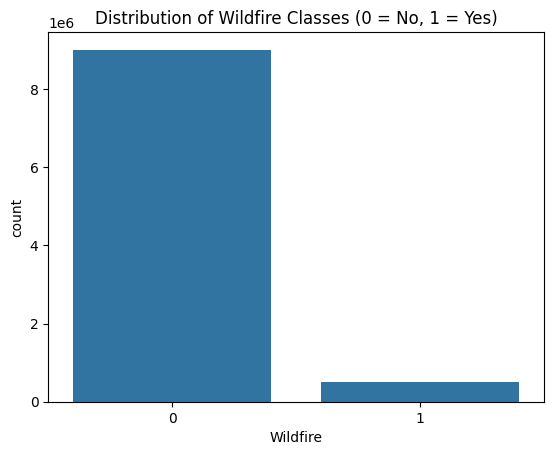

,proportion
Wildfire,
0,94.720621
1,5.279379


In [16]:
sns.countplot(x='Wildfire', data=wild_fires)
plt.title("Distribution of Wildfire Classes (0 = No, 1 = Yes)")
plt.show()

wild_fires['Wildfire'].value_counts(normalize=True) * 100

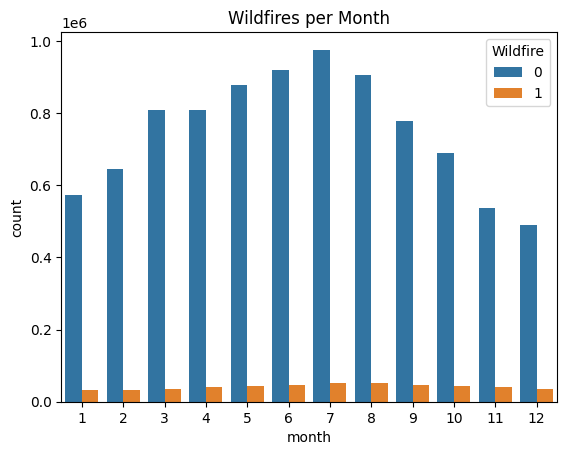

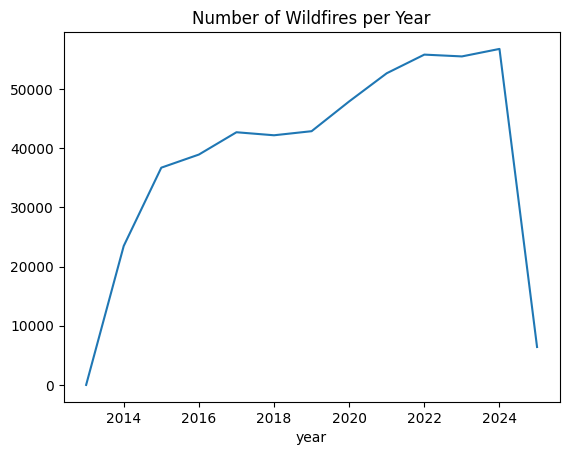

In [17]:
wild_fires['year'] = wild_fires['datetime'].dt.year
wild_fires['month'] = wild_fires['datetime'].dt.month
wild_fires['day_of_week'] = wild_fires['datetime'].dt.day_name()

sns.countplot(x='month', hue='Wildfire', data=wild_fires)
plt.title("Wildfires per Month")
plt.show()

wild_fires.groupby('year')['Wildfire'].sum().plot()
plt.title("Number of Wildfires per Year")
plt.show()

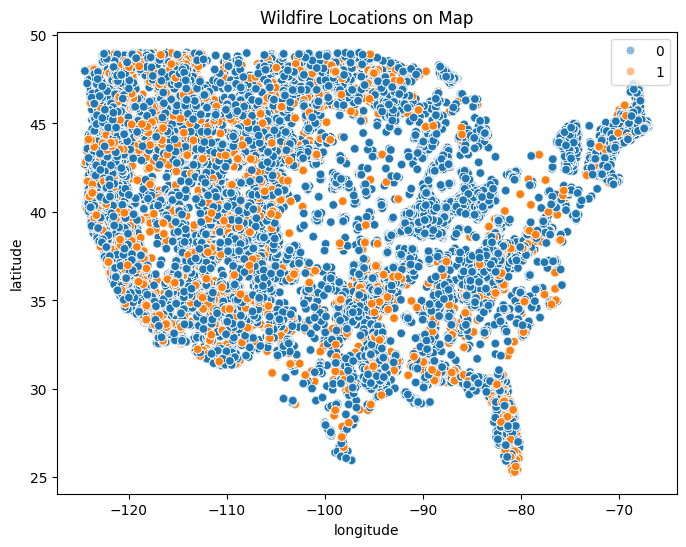

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='longitude', y='latitude', hue='Wildfire', data=wild_fires, alpha=0.5)
plt.title("Wildfire Locations on Map")
plt.legend(loc='upper right')     # or 'lower right', 'upper left', etc.
plt.show()

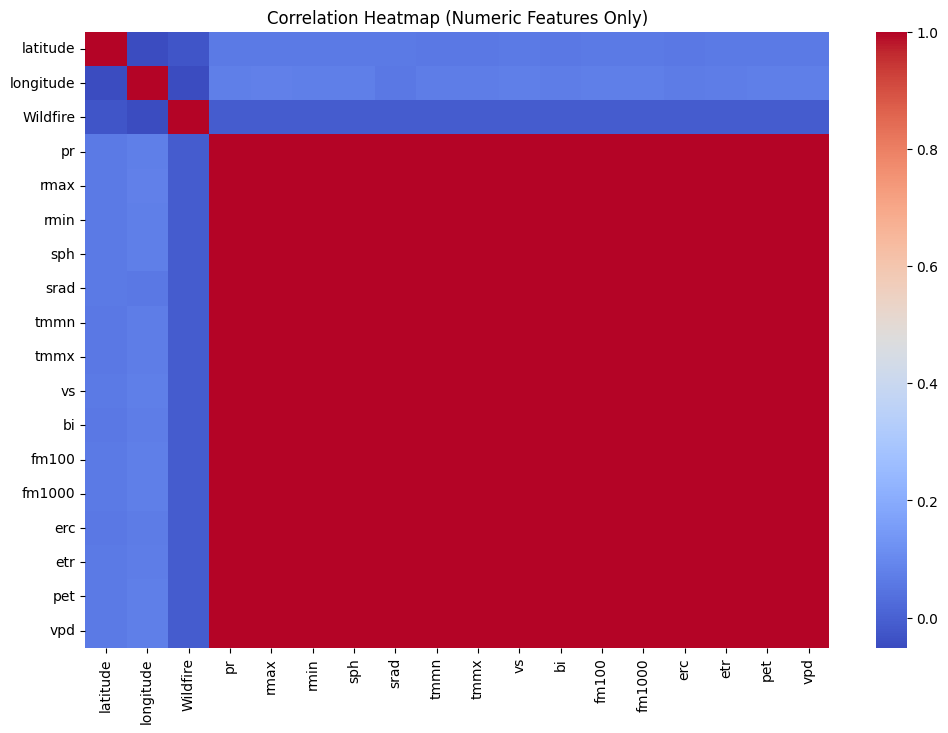

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(wild_fires.select_dtypes(include=['int64', 'float64']).corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [10]:
# Only numeric columns
numeric_data = wild_fires.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr_matrix = numeric_data.corr()

# Display as text
print(corr_matrix)


           latitude  longitude  Wildfire        pr      rmax      rmin  \
latitude   1.000000  -0.049644 -0.030539  0.060371  0.061846  0.061560   
longitude -0.049644   1.000000 -0.051478  0.072715  0.076203  0.075728   
Wildfire  -0.030539  -0.051478  1.000000 -0.012321 -0.012689 -0.012672   
pr         0.060371   0.072715 -0.012321  1.000000  0.999927  0.999949   
rmax       0.061846   0.076203 -0.012689  0.999927  1.000000  0.999965   
rmin       0.061560   0.075728 -0.012672  0.999949  0.999965  1.000000   
sph        0.060448   0.072250 -0.012296  0.999993  0.999925  0.999942   
srad       0.060927   0.056825 -0.012319  0.998596  0.998353  0.998312   
tmmn       0.058872   0.071282 -0.012130  0.999980  0.999896  0.999917   
tmmx       0.058896   0.070659 -0.012093  0.999972  0.999881  0.999889   
vs         0.060512   0.072488 -0.012313  0.999993  0.999926  0.999944   
bi         0.058383   0.067686 -0.011754  0.999874  0.999716  0.999741   
fm100      0.060690   0.073458 -0.0124

In [16]:
# Absolute correlations with the target
target_corr = corr_matrix['Wildfire'].abs().sort_values(ascending=False)

# Select top 9 features (excluding 'Wildfire' itself)
top_features = target_corr.index[1:]
print(top_features)


Index(['longitude', 'latitude', 'rmax', 'rmin', 'fm1000', 'fm100', 'pr',
       'srad', 'vs', 'sph', 'vpd', 'pet', 'etr', 'tmmn', 'tmmx', 'bi', 'erc'],
      dtype='object')


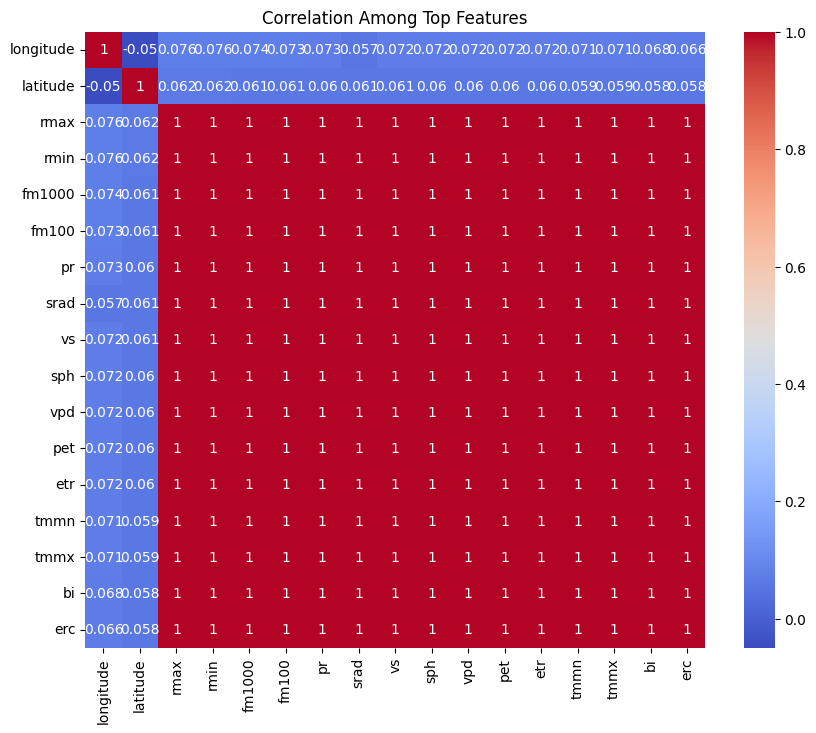

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data[top_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Among Top Features")
plt.show()


In [18]:
corr_with_target = numeric_data[top_features].join(wild_fires['Wildfire']).corr()['Wildfire'].sort_values(ascending=False)
print(corr_with_target)


Wildfire     1.000000
erc         -0.011491
bi          -0.011754
tmmx        -0.012093
tmmn        -0.012130
etr         -0.012253
pet         -0.012271
vpd         -0.012276
sph         -0.012296
vs          -0.012313
srad        -0.012319
pr          -0.012321
fm100       -0.012422
fm1000      -0.012503
rmin        -0.012672
rmax        -0.012689
latitude    -0.030539
longitude   -0.051478
Name: Wildfire, dtype: float64


### **Reasoning**

* **Weak correlation with Wildfire:** All features have very low linear correlation with the target, so no single feature is strongly predictive.
* **High multicollinearity:** Many features are highly correlated with each other (`rmax` ~ `rmin`, `fm100` ~ `fm1000`, `vs` ~ `sph` ~ `vpd`), which can make models unstable.
* **Spatial info:** Longitude and latitude can help capture wildfire distribution.

---

### **Next Steps**

1. **Select features:** Keep one per correlated group, e.g., `rmax`, `fm100`, `vs`, `tmmx`, `longitude`.
2. **Choose models:** Use tree-based models (Random Forest, XGBoost) for nonlinear relationships.
3. **Handle imbalance:** Apply SMOTE, undersampling, or class weights.
4. **Preprocess:** Scale features if needed, split into train/test sets.
5. **Evaluate:** Use metrics like Precision, Recall, F1-score, and ROC-AUC.

---
